### Graphical Models

Graphs are more than just a visualisation tool from a causal point of view. They can be defined in multiple ways. You can think of them as discrete mathematical structures, abstract representations of real-world entities and relations between them, or computational data structures. What these perspectives have in common are the basic building blocks of graphs: <b>nodes</b> (vertices) and <b>edges</b> (links) that connect the nodes.

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()
graphviz_path = os.getenv("GRAPHVIZ_BIN")
if graphviz_path:
    os.environ["PATH"] += os.pathsep + graphviz_path
else:
    print("GRAPHVIZ_BIN not set in .env — Graphviz may not run.")

#### Types of graphs

<b>Undirected vs directed</b>: Directed graphs are graphs with directed edges, and undirected graphs have undirected edges.

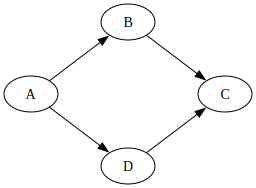

In [3]:
# Create a directed graph
directed_graph = graphviz.Digraph(
    format='png',
    graph_attr={
        'rankdir':'LR', 
        'ranksep': '.6',
        'nodesep': '1.5'
    })

# Add nodes
nodes = ['A', 'B', 'D', 'C']
[directed_graph.node(n) for n in nodes]

directed_graph.edges(['AB', 'AD', 'BC', 'DC'])
directed_graph

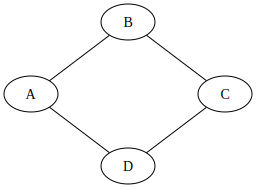

In [6]:
# Create an undirected graph
undirected_graph = graphviz.Graph(
    format='png',
    graph_attr={
        'rankdir':'LR', 
        'ranksep': '.6',
        'nodesep': '1.5'
    })

# Add nodes
undirected_graph.edge('A', 'B')
undirected_graph.edge('A', 'D')
undirected_graph.edge('B', 'C')
undirected_graph.edge('D', 'C')

undirected_graph

<b>Cyclic vs acyclic</b>: Cyclic graphs are graphs that allow for loops. Loops are paths that lead from a given node to itself. They can be direct (from a node to itself; a self-loop) or indirect (going through other nodes). The examples above are acyclic. Most methods presented in this book assume that the underlying system can be accurately represented by an acyclic graph.

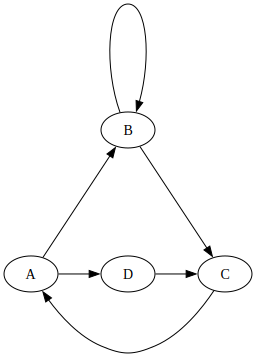

In [8]:
# Create a cyclc directed graph
cyclic_graph = graphviz.Digraph(
    format='png',
    graph_attr={
        'rankdir':'LR', 
        'ranksep': '.6',
        'nodesep': '1.5'
    })

# Add nodes
nodes = ['A', 'B', 'D', 'C']
[cyclic_graph.node(n) for n in nodes]

cyclic_graph.edges(['AB', 'AD', 'BC', 'DC', 'BB', 'CA'])
cyclic_graph

<b>Connected vs disconnected</b>: In connected graphs, every node has an edge with at least one other node (as in examples above). Disconnected graphs contain no edges. Real-world causal graphs are rarely fully connected - this would imply that everything is <i>directly</i> causally related to everything else either as a cause or an effect.

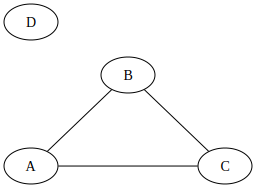

In [12]:
# Create an undirected graph
unconnected_graph = graphviz.Graph(
    format='png',
    graph_attr={
        'rankdir':'LR', 
        'ranksep': '.6',
        'nodesep': '1.5'
    })

# Add nodes
unconnected_graph.edge('A', 'B')
unconnected_graph.edge('C', 'A')
unconnected_graph.edge('B', 'C')
unconnected_graph.node('D')

unconnected_graph

<b>Weighted vs unweighted graphs</b>: Weighted graphs contain additional information on the edges. Each edge is associated with a number (called a weight), which may represent the strength of the connection between two nodes, distance, or any other useful metric. 

#### Graph representations

An intuitive way to represent graphs in computer-readable form is to represent a graph as a list of nodes and a list of edges, but this is not efficient computationally speaking. To optimise certain types of computations, we can represent a graph as an <b>adjacency matrix</b>. This representation preserves the information about the graph structure and the strength of connections between the nodes. A limitation is that they cannot contain any additional metadata about nodes or edges.

<b><u>Adjacency matrices</u></b>: An unweighted adjacency matrix is one that contains only zeros and ones. One represents an edge, and zero represents a lack of an edge. Nodes are encoded as row and column indices. We use zero-indexing. These matrices are square M x M matrices, where M is the number of nodes. Each positive entry in the matrix encodes an edge between a pair of nodes. 

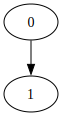

In [13]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1']
edges = ['01']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph

In [16]:
adj_matrix = np.array([
    [0, 1],
    [0, 0]
])
adj_matrix

array([[0, 1],
       [0, 0]])

Above is a 2x2 adjacency matrix and its corresponding graph. The only non-zero element (1) in the matrix is located in the upper-right corner. Its index is (0,1) because the element is in the 0th row and the first column. It means that there is only one edge in the graph that goes from node 0 (the row index) to node 1 (the column index).

#### Limitations of DAGs

DAGs capture certain intuitions about causality well. 